# Bài 1: Viet chuong trinh cai dat phuong phap bootstrap de xuat ra phan bo lay mau va dai tin cay cua mot thong so thong ke cua bien cua dataset


Head point:  2925292.6601417777
Tail point:  3494507.89381073


Text(3511980.4332797835, 52.92000000000001, '3494507.89')

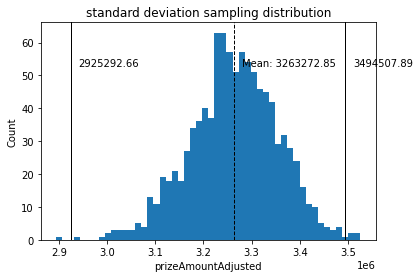

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# read csv
data = pd.read_csv('../State/Nobel/complete.csv')
prizeAmountAdjusted = np.array(data["prizeAmountAdjusted"])
# Std = np.std(prizeAmountAdjusted)

N = len(prizeAmountAdjusted)
n = 200
M = 1000
x = 90
resample = []
def myBootstrap(n, M, x):
    for _ in range(0, M):
        index = np.random.randint(0, N - 1, n)
        sample = prizeAmountAdjusted[index]
        Std = np.std(sample)
        resample.append(Std)
        
    Cut = (np.max(resample) - np.min(resample)) * ((100 - x) / 2 / 100)
    Head = np.min(resample) + Cut
    Tail = np.max(resample) - Cut
    return (resample, Head, Tail)
    
resample, Head, Tail = myBootstrap(n, M, x)
plt.hist(resample, bins = 50)
plt.xlabel('prizeAmountAdjusted')
plt.ylabel('Count')
plt.title(f'standard deviation sampling distribution')
print("Head point: ", Head)
print("Tail point: ", Tail)
plt.axvline(Head, color = 'k', linestyle = 'solid', linewidth = 1)
plt.axvline(Tail, color = 'k', linestyle = 'solid', linewidth = 1)
plt.axvline(np.mean(resample), color = 'k', linestyle = 'dashed', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(resample) * 1.005, max_ylim * 0.8, 'Mean: {:.2f}'.format(np.mean(resample)))
plt.text(Head * 1.005, max_ylim * 0.8, '{:.2f}'.format(Head))
plt.text(Tail * 1.005, max_ylim * 0.8, '{:.2f}'.format(Tail))
# x_values = [point1[0], point2[0]]
# y_values = [point1[1], point2[1]]
# plt.plot(x_values, y_values, 'bo', linestyle="--")
# print(len(resample))
# print(np.max(resample))
# print(np.min(resample))
# print((np.max(resample) - np.min(resample)) * ((100 - x) / 2 / 100))


Bai 2: Dựa trên cùng dataset với Câu 1, viết chương trình xuất ra và thuyết trình các thống kê mô tả
quan trọng của các biến, các mối quan hệ giữa các biến đã có và biến tạo thêm (nếu có), quy
luật tiềm ẩn có thể suy diễn từ dataset nhờ các công cụ trực quan hoá dữ liệu (ví dụ:
distribution plot, heat/cluster map, linear model plot,…).

KeyError: 'species'

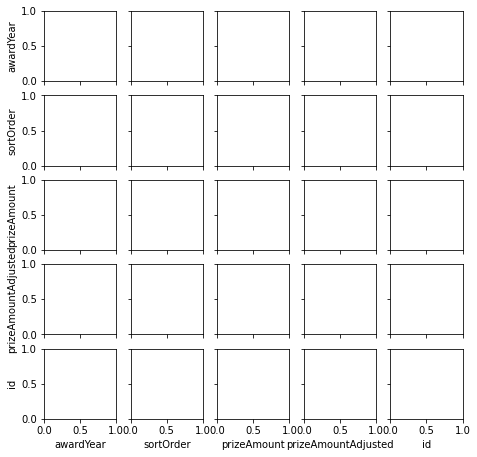

In [80]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../State/Nobel/complete.csv')
#data = sns.load_dataset('../State/Nobel/complete.csv')
sns.pairplot(data, hue='species', height=1.5)
